In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import re
sns.set()

In [2]:
data = pd.read_excel('week2_challenge_data_source.xlsx')

In [4]:
dat = data.copy()
da = data.copy()

In [5]:
dat['TCP_Rtms'] = dat['TCP DL Retrans. Vol (Bytes)'] + dat['TCP UL Retrans. Vol (Bytes)']
dat['RTT'] = dat['Avg RTT DL (ms)'] + dat['Avg RTT UL (ms)']
dat['Throughput'] = dat['Avg Bearer TP DL (kbps)'] + dat['Avg Bearer TP UL (kbps)']

In [6]:
#Filter out the important columns to work with in this task
df = dat.iloc[:, 55:]
df.insert(0, 'MSISDN/Number',dat['MSISDN/Number'])
df.insert(1, 'Handset Type',dat['Handset Type'])

In [7]:
# Replacing missing values with mode.
#df.fillna(df.mode(), inplace = True)
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [8]:
df.head()

,MSISDN/Number,Handset Type,TCP_Rtms,RTT,Throughput
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,2660.0,47.0,67.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),2660.0,70.0,42.0
2,3.376063e+10,Samsung Galaxy A8 (2018),2660.0,29.0,15.0
3,3.375034e+10,undefined,2660.0,29.0,88.0
4,3.369980e+10,Samsung Sm-G390F,2660.0,29.0,15.0


In [9]:
# confriming that there are no missing values after replacing them with the mode
df.isna().sum()

MSISDN/Number    0
Handset Type     0
TCP_Rtms         0
RTT              0
Throughput       0
dtype: int64

In [10]:
df.set_index('MSISDN/Number')

,Handset Type,TCP_Rtms,RTT,Throughput
MSISDN/Number,,,,
3.366496e+10,Samsung Galaxy A5 Sm-A520F,2660.0,47.0,67.0
3.368185e+10,Samsung Galaxy J5 (Sm-J530),2660.0,70.0,42.0
3.376063e+10,Samsung Galaxy A8 (2018),2660.0,29.0,15.0
3.375034e+10,undefined,2660.0,29.0,88.0
3.369980e+10,Samsung Sm-G390F,2660.0,29.0,15.0
...,...,...,...,...
3.365069e+10,Apple iPhone 8 Plus (A1897),2660.0,32.0,117.0
3.366345e+10,Apple iPhone Se (A1723),2660.0,29.0,77.0
3.362189e+10,Apple iPhone Xs (A2097),2660.0,49.0,90.0


In [82]:
#make a copy to work with
dff = df.copy()
drt = df.copy()
dfh = df.copy()
dfth = df.copy()
cdf = df.copy()

In [14]:
# 3.1 Averages and counts per customer
tcp = dff.groupby('MSISDN/Number')['TCP_Rtms'].mean()
rtt = drt.groupby('MSISDN/Number')['RTT'].mean()
thrput = dfth.groupby('MSISDN/Number')['Throughput'].mean()
dfc = dfh.groupby('MSISDN/Number')['Handset Type'].value_counts()

## 3.2 Top 10, bottom 10 and most frequent

In [20]:
#TCP
dff.sort_values(by=['TCP_Rtms'],inplace = True)
top10 = dff.head(10)['TCP_Rtms']
bot10 = dff.tail(10)['TCP_Rtms']
mod = dff['TCP_Rtms'].mode()

In [24]:
#RTT
drt.sort_values(by=['RTT'],inplace = True)
top10 = drt.head(10)['RTT']
bot10 = drt.tail(10)['RTT']
mod = drt['TCP_Rtms'].mode()

In [30]:
# Throughput 
dfth.sort_values(by=['Throughput'],inplace = True)
top10 = dfth.head(10)['Throughput']
bot10 = dfth.tail(10)['Throughput']
mod = dfth['Throughput'].mode()

## 3.3 Computations

Text(0.5, 1.0, 'Avg throughput distribution per handset type')

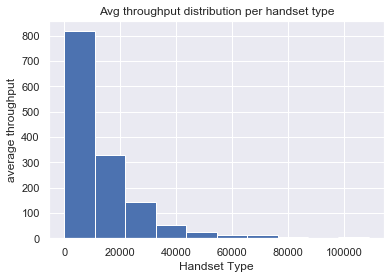

In [31]:
# Distribution of average throughput per handset type
dfh.groupby('Handset Type')['Throughput'].mean().hist()
plt.xlabel('Handset Type')
plt.ylabel('average throughput')
plt.title('Avg throughput distribution per handset type')

The distribution shows that the average distribution of throughput per handset is not normal. It shows a right tailed distribution

Text(0.5, 1.0, 'Avg TCP distribution per handset type')

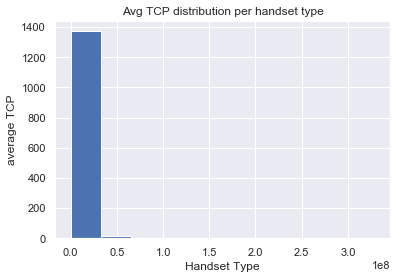

In [35]:
# Distribution of average TCP per handset type
drt.groupby('Handset Type')['TCP_Rtms'].mean().hist()
plt.xlabel('Handset Type')
plt.ylabel('average TCP')
plt.title('Avg TCP distribution per handset type')

The distribution plot of the average TCP distribution by handset type is also not normally distributed. It shows a right tail skewness

In [83]:
wdat = cdf.iloc[:, 2:]
#wdat.set_index('TCP_Rtms', inplace = True)

In [85]:
wdat.head()

,TCP_Rtms,RTT,Throughput
0,2660.0,47.0,67.0
1,2660.0,70.0,42.0
2,2660.0,29.0,15.0
3,2660.0,29.0,88.0
4,2660.0,29.0,15.0


In [77]:
# labelencoder = LabelEncoder()
# col = wdat['Handset Type']

# cdf= wdat.apply(lambda col: labelencoder.fit_transform(col.astype(str)), axis=0, result_type='expand')
# #newdat = preprocessing.normalize(cdf, norm='l2')

In [86]:
newdat = preprocessing.normalize(wdat, norm='l2')
dataset = pd.DataFrame({'TCP_Rtms': newdat[:,0], 'RTT':newdat[:,1],'Throughput':newdat[:,2]}) 

In [87]:
newdat

array([[0.99952702, 0.01766082, 0.02517606],
       [0.99952942, 0.02630341, 0.01578204],
       [0.99992468, 0.01090143, 0.00563867],
       ...,
       [0.99925877, 0.0184074 , 0.03380951],
       [0.99951947, 0.01578189, 0.0266789 ],
       [0.99966027, 0.01089855, 0.02367616]])

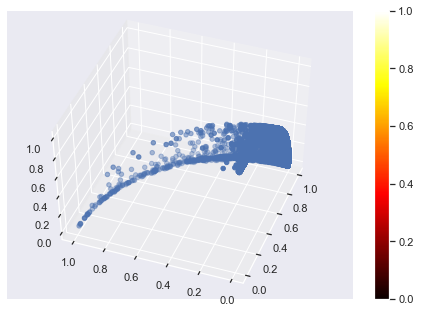

In [93]:
kmeans = KMeans(3)
identified_cluster = kmeans.fit_predict(newdat)

data_wt_clusters = dataset.copy()
data_wt_clusters['clusters'] = identified_cluster
fig =plt.figure()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#ax = fig.add_subplot(111,projection='3d')
ax = Axes3D(fig, rect=[1, 1, 1, 1], elev=48, azim=200)

x = data_wt_clusters['TCP_Rtms']
y = data_wt_clusters['RTT']
z = data_wt_clusters['Throughput']

img = ax.scatter(x,y,z, cmap=plt.hot())
fig.colorbar(img)
plt.show()

The output of the cluster is really not clear to derive any meaningful insights the fact that, one of the clusters has more members than the other two clusters
